In [1]:
import pandas as pd
from nltk.corpus import cmudict

In [34]:
freq_data = pd.read_csv("SUBTLEXus74286wordstextversion.txt", sep="	", names=["Word","FREQcount","CDcount","FREQlow","Cdlow","Freq_Per_Mil","Log_Freq","SUBTLCD","Lg10CD"])
freq_data = freq_data[["Word","Freq_Per_Mil","Log_Freq"]]

In [35]:
d = cmudict.dict()
def nsyl(word):
  return [len(list(y for y in x if y[-1].isdigit())) for x in d[str(word).lower()]][0]

In [36]:
syll_dict = pd.DataFrame(list(d.keys())[3:len(d.keys())], columns=['Word']) 
freq_data_full = pd.merge(syll_dict,freq_data,on="Word")

In [37]:
freq_data_full['Word_Syll'] = freq_data_full['Word'].apply(lambda x: nsyl(x))

In [39]:
freq_data_full

,Word,Freq_Per_Mil,Log_Freq,Word_Syll
0,aardvark,0.41,1.3424,2
1,aback,0.29,1.2041,2
2,abacus,0.24,1.1139,3
3,abalone,0.51,1.4314,4
4,abandon,8.10,2.6170,3
...,...,...,...,...
40320,zooms,0.06,0.6021,1
40321,zoos,0.76,1.6021,1
40322,zucchini,0.96,1.6990,3
40323,zydeco,0.27,1.1761,3


In [40]:
freq_data_full.to_csv("big_df_freqs_sylls.csv",index_label=False)

In [41]:
#Calculate correlations 

freq_data_full = freq_data_full.astype({'Word_Syll':'float'})

corr_length = freq_data_full["Log_Freq"].corr(freq_data_full["Word_Syll"])
print("the correlation between frequency and word length is", corr_length)

the correlation between frequency and word length is -0.31751431973050137


In [46]:
import seaborn as sns
from scipy import stats

sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Axes: xlabel='Word_Syll', ylabel='Log_Freq'>

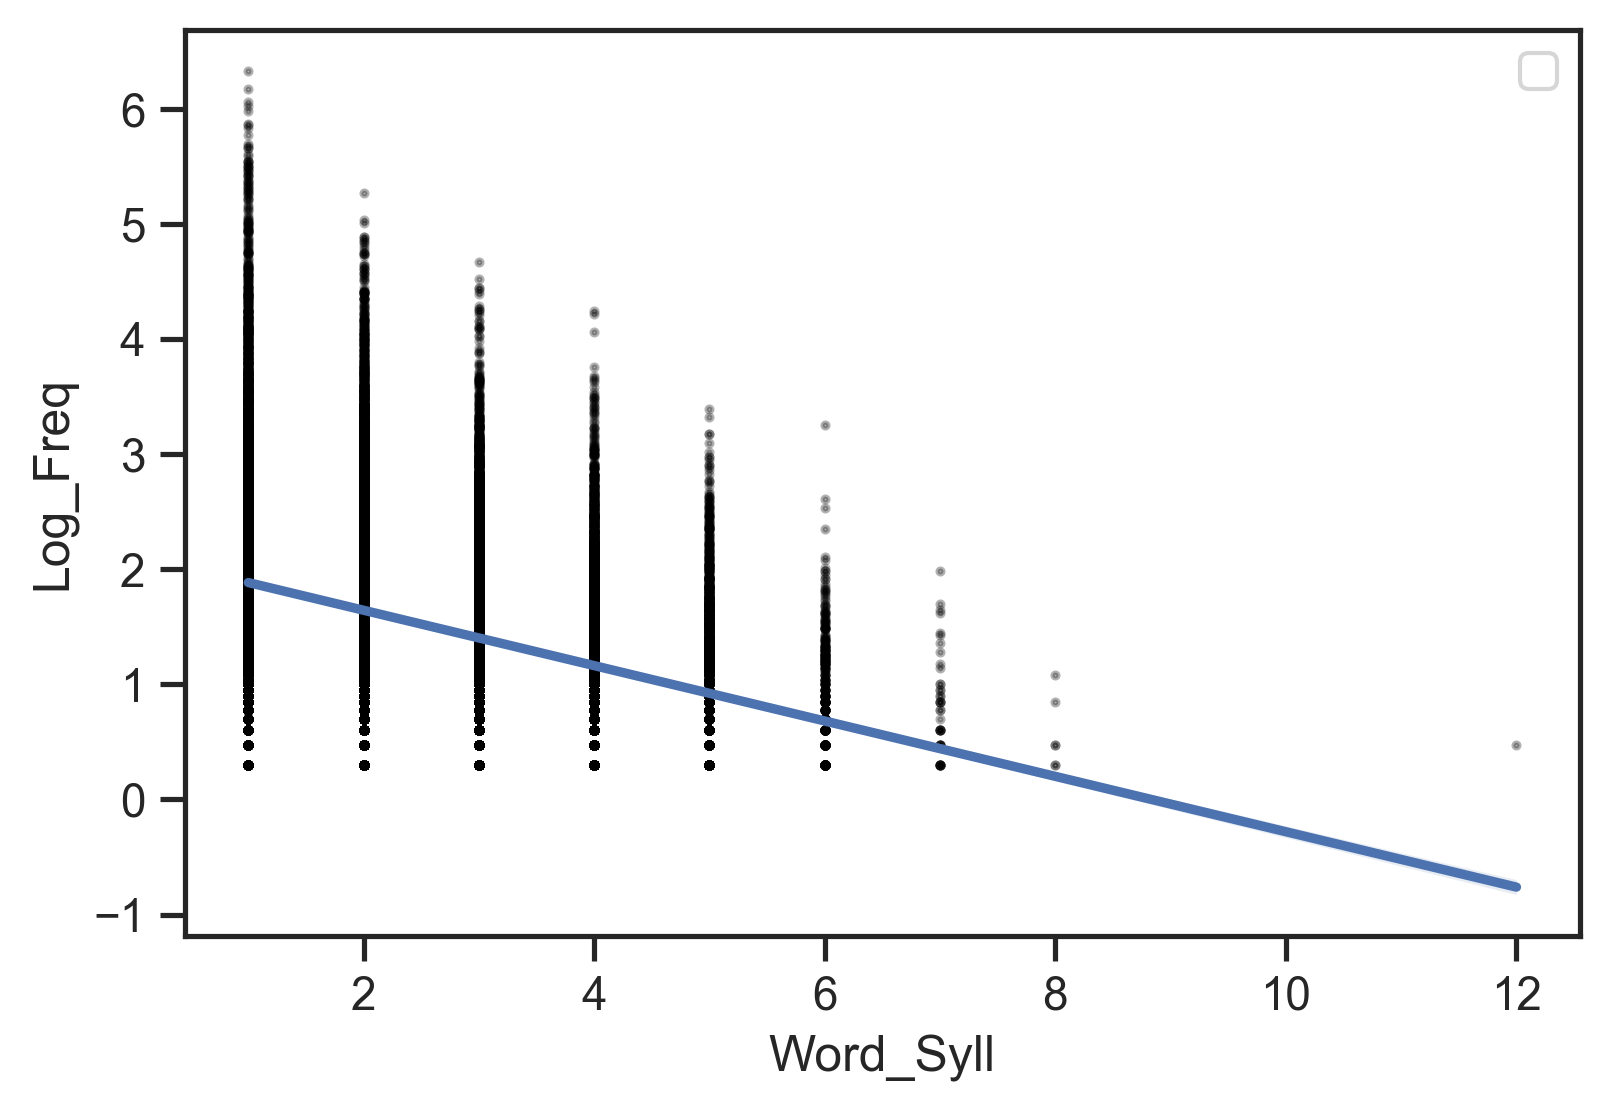

In [47]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(freq_data_full["Log_Freq"],freq_data_full["Word_Syll"])

ax = sns.regplot(y = freq_data_full["Log_Freq"], x = freq_data_full["Word_Syll"],
            scatter_kws = {"color": "black", "alpha": 0.3,'s':2},
            ci = 95) 
ax.legend()

ax

<Axes: xlabel='Log_Freq_Per_Mil1', ylabel='Word_Syll'>

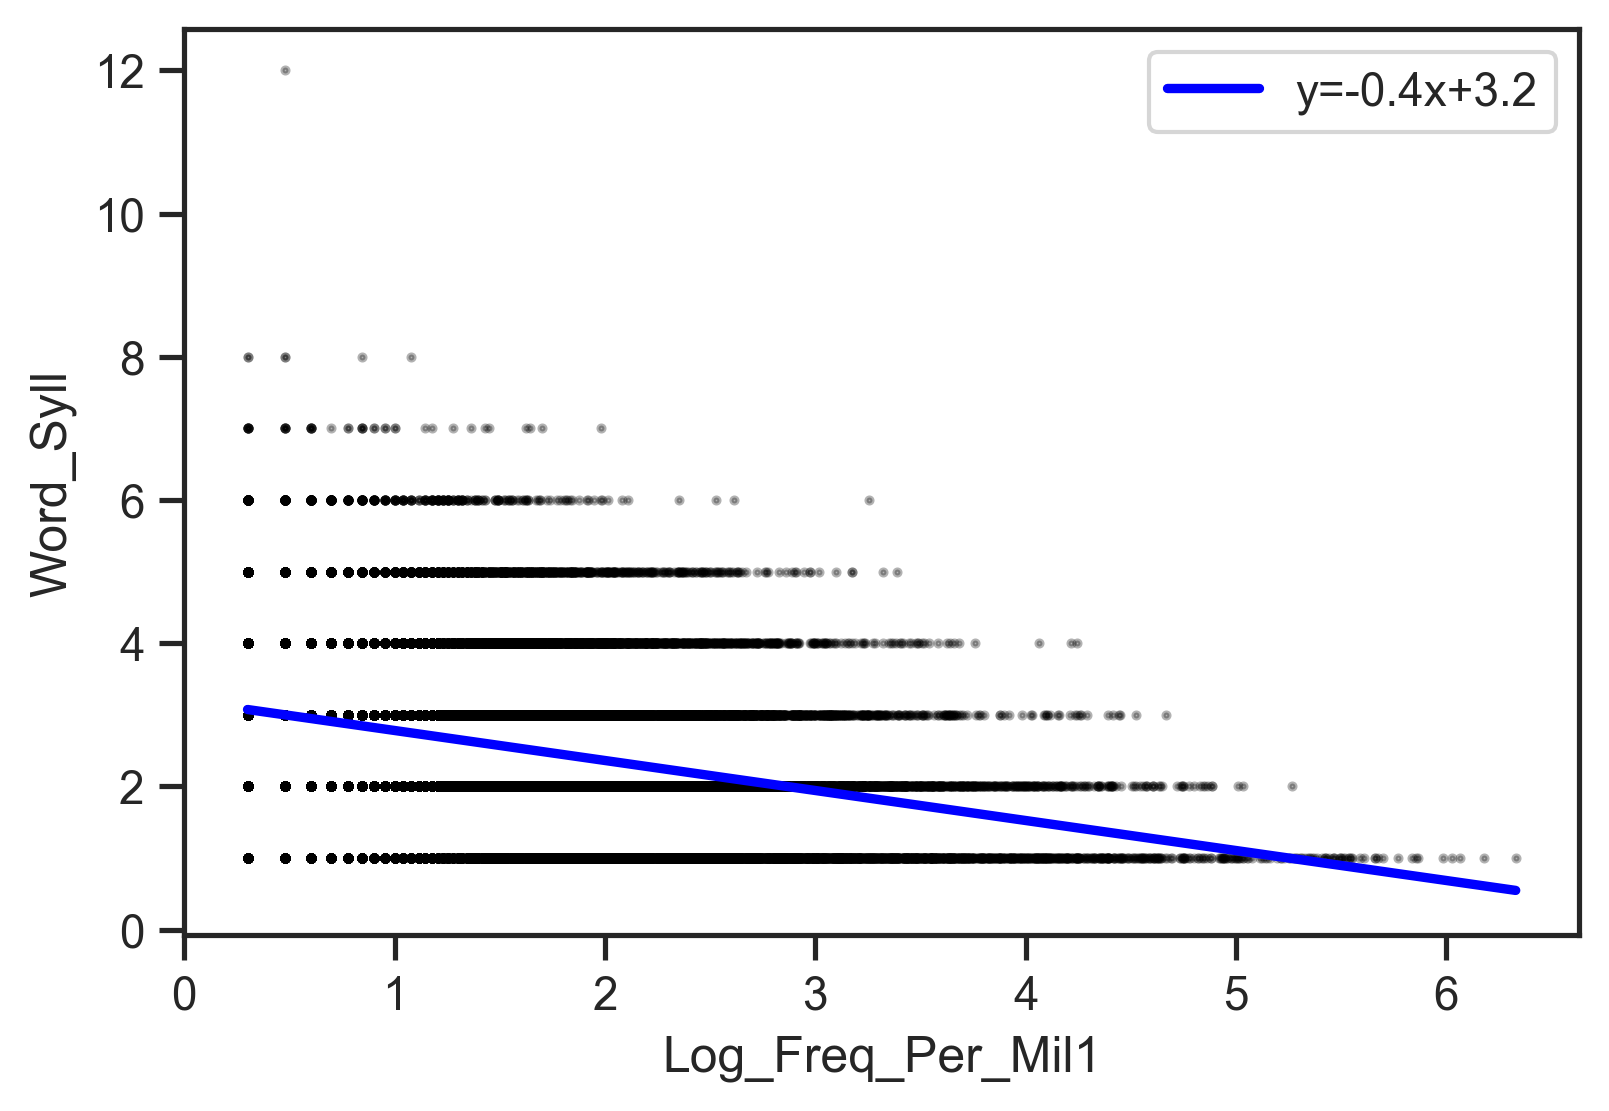

In [ ]:
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(freq_data_full["Log_Freq_Per_Mil1"],freq_data_full["Word_Syll"])

ax = sns.regplot(x = freq_data_full["Log_Freq_Per_Mil1"], y = freq_data_full["Word_Syll"],
            scatter_kws = {"color": "black", "alpha": 0.3,'s':2},
            line_kws = {"color": "blue", 'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)},
            ci = 95) 
ax.legend()

ax